In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PASTA_EEG = "data/train_eegs/"
PASTA_FOURIER = "data/fourier/"
SPS = 200


In [3]:
frame_size = SPS
half_frame = frame_size//2
hop = frame_size//2
frequency_bins = (SPS//2) +1
sampling_rate = SPS

In [4]:
df = pd.read_parquet(PASTA_EEG + str(1628180742) + '.parquet', engine='pyarrow')

In [5]:
signal_size = df.shape[0]
windows = ((signal_size-frame_size)//hop) +1

In [6]:
all_data = [] 

for i in range(0, signal_size-hop, hop):
    r_i = []
    for c in df.columns:
        f = np.fft.fft(  df[c][i:i+frame_size] - df[c][i:i+frame_size].mean() )
        r_i.append( np.concatenate([
                abs(f.real[:half_frame])/half_frame, 
                abs(f.imag[:half_frame])/half_frame
            ]
        ))

    all_data.append(r_i)

In [7]:
all_data = np.asarray(all_data)

In [8]:
all_data[0].shape

(20, 200)

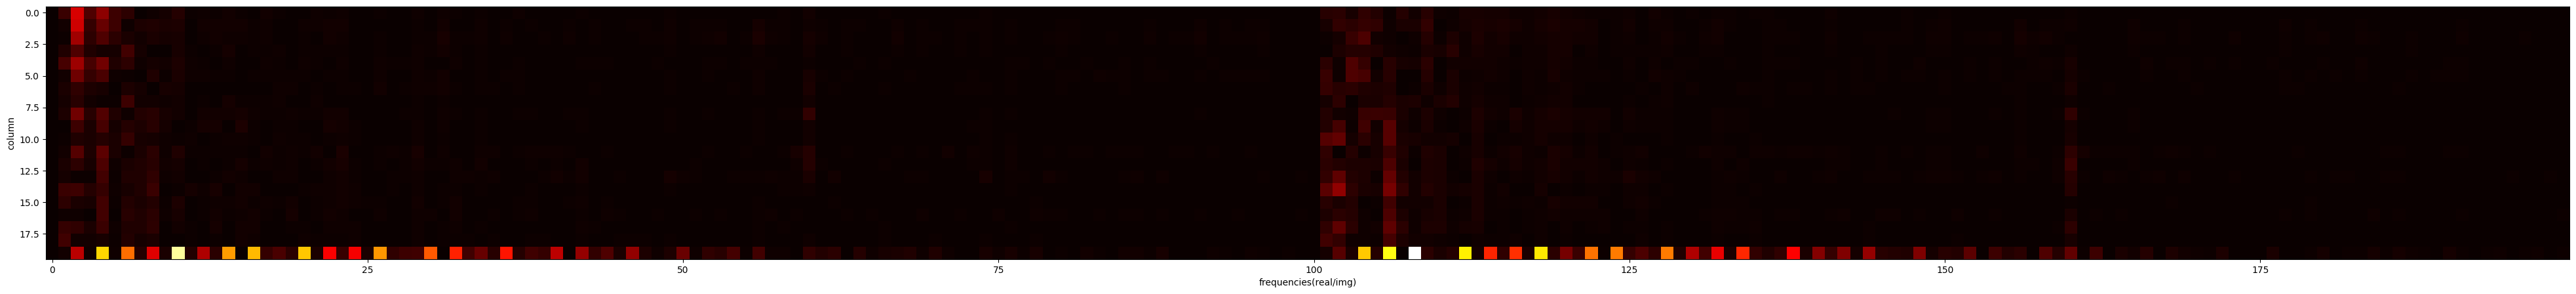

In [129]:
plt.figure(figsize=(50,5))
plt.imshow(all_data[0], cmap='hot', interpolation='nearest')
plt.ylabel('column')
plt.xlabel('frequencies(real/img)')
plt.show()

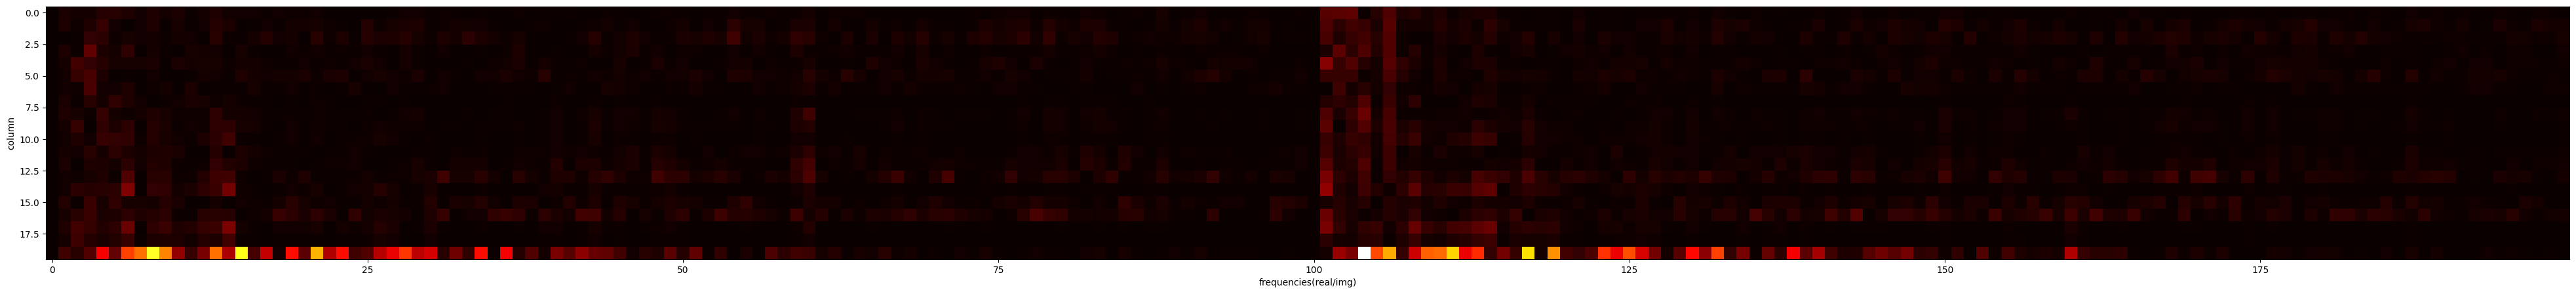

In [131]:
plt.figure(figsize=(50,5))
plt.imshow(all_data[100], cmap='hot', interpolation='nearest')
plt.ylabel('column')
plt.xlabel('frequencies(real/img)')
plt.show()

In [4]:
class_df = pd.read_csv("data/train.csv")
eegs_id = class_df['eeg_id'].unique()

In [5]:
from os import listdir

In [10]:
ja_tem = [x.split('.')[0] for x in listdir(PASTA_FOURIER)]


In [11]:
p_proc = eegs_id[ np.isin(eegs_id,  ja_tem, invert=True) ]

In [12]:
len(p_proc)

891

In [13]:
for egg in p_proc:
    df = pd.read_parquet(PASTA_EEG + str(egg) + '.parquet', engine='pyarrow')
    all_data = []
    signal_size = df.shape[0]
    windows = ((signal_size-frame_size)//hop) +1

    for i in range(0, signal_size-hop, hop):
        r_i = []
        for c in df.columns:
            f = np.fft.fft(  df[c][i:i+frame_size] - df[c][i:i+frame_size].mean() )
            r_i.append( np.concatenate([
                    abs(f.real[:half_frame])/half_frame, 
                    abs(f.imag[:half_frame])/half_frame
                ]
            ))
        all_data.append(r_i)

    np.save(PASTA_FOURIER+str(egg), np.asarray(all_data))